<a href="https://colab.research.google.com/github/sadiqa682/DL-Car-Price-Prediction/blob/main/Assignment1Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lillylord","key":"0971666c7588160e773baf5f04dcae2f"}'}

In [9]:
!mkdir -p ~/.kaggle

In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-08 06:45:48           2244  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1301  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1000  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            467  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [18]:
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 33.2MB/s]


In [20]:
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [ ]:
## from zipfile import ZipFile
## file_name  = "car-price-prediction.zip"

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


In [24]:
from zipfile import ZipFile
file_name  = "car-price-prediction.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [25]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [26]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [27]:
print(df.shape)

(205, 26)


In [28]:
print(df.columns.tolist())

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [29]:
# To check the null values column wise
df.isnull().sum(axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
## To check the categorial data

## Convert non numerical values into numerical values

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['fueltype']=labelencoder.fit_transform(df['fueltype'])
df['aspiration']=labelencoder.fit_transform(df['aspiration'])
df['carbody']=labelencoder.fit_transform(df['carbody'])
df['drivewheel']=labelencoder.fit_transform(df['drivewheel'])
df['enginelocation']=labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem']=labelencoder.fit_transform(df['fuelsystem'])

In [33]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})

In [34]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Correlation matrix

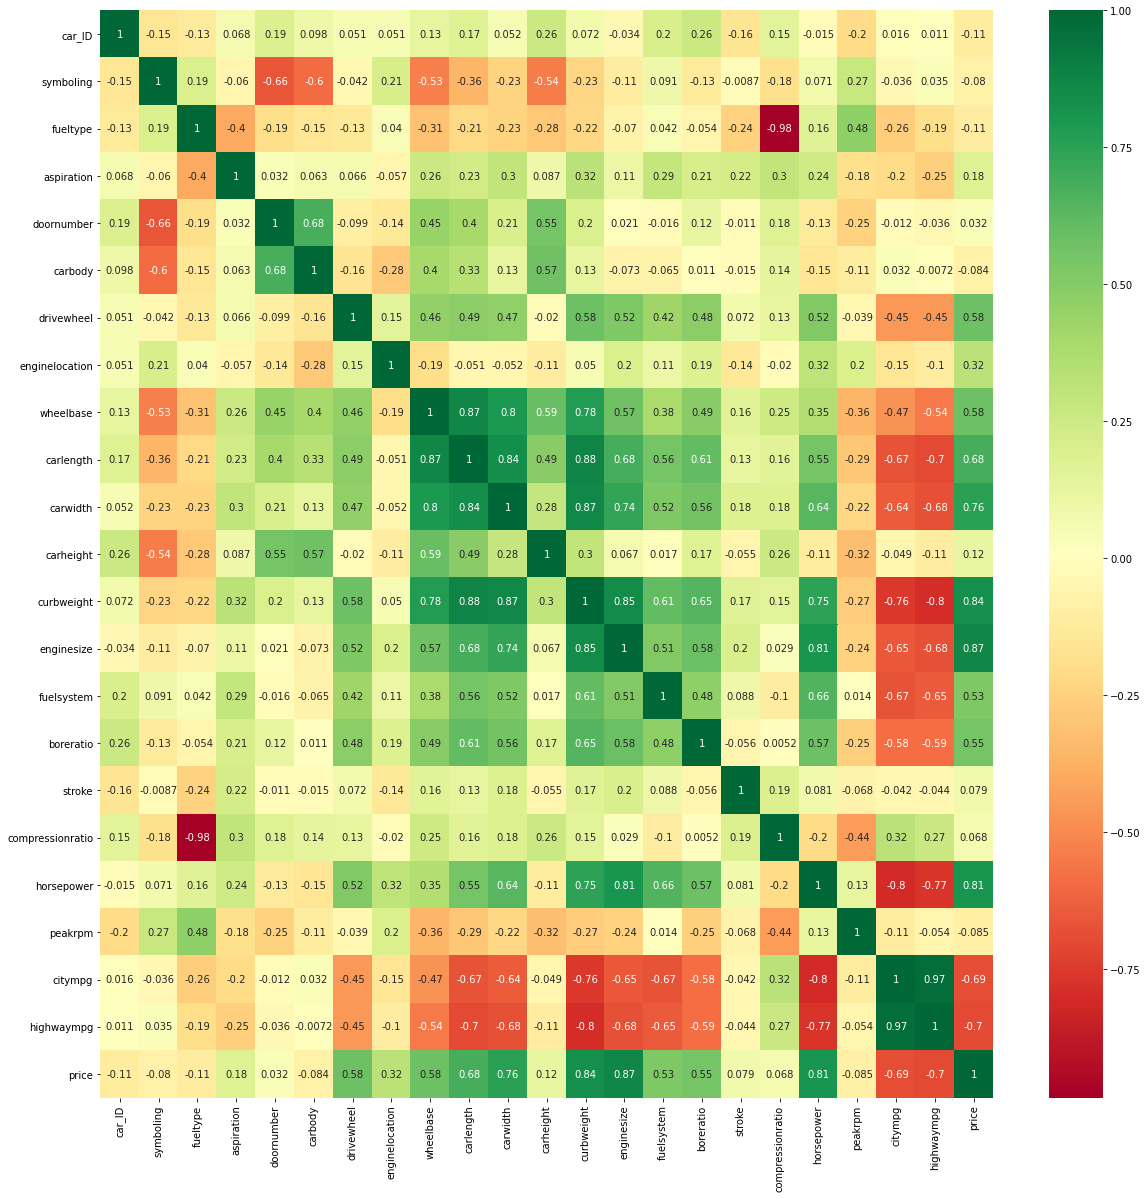

In [37]:
coormat=df.corr()
top_corr_features=coormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
data1 = df[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [39]:
print(data1.shape)
data1.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


### Split Data::

In [40]:
#x=(data1.loc[:,data1.columns != 'price'])
#y=(data1.loc[:,data1.columns == 'price'])
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30 ,random_state=42)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1) # 0.25 x 0.8 = 0.2

In [61]:
# Splitting The Dataset Into Training and Testing Data

train_data = data1.iloc[:144,:]
train_data

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
77,68,2.97,92,1944,64.4,157.3,93.7,1,6189.0,0
64,84,3.39,122,2425,66.5,177.8,98.8,1,11245.0,0
174,73,3.27,110,2480,66.5,175.6,102.4,1,10698.0,0
182,52,3.01,97,2261,65.5,171.7,97.3,1,7775.0,0
96,69,3.15,97,1971,63.8,165.3,94.5,1,7499.0,0
...,...,...,...,...,...,...,...,...,...,...
74,184,3.80,304,3715,72.0,199.2,112.0,2,45400.0,0
125,143,3.94,151,2778,68.3,168.9,94.5,2,22018.0,0
127,207,3.74,194,2756,65.0,168.9,89.5,2,34028.0,1
66,72,3.43,134,2700,66.1,175.0,104.9,2,18344.0,0


In [51]:
#x_train

In [62]:
test_data = data1.iloc[145:,:]
test_data.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
33,76,2.91,92,1940,64.0,150.0,93.7,1,6529.0,0
176,92,3.31,122,2414,66.5,175.6,102.4,1,10898.0,0
78,68,2.97,92,2004,64.4,157.3,93.7,1,6669.0,0
186,85,3.19,109,2275,65.5,171.7,97.3,1,8495.0,0
67,123,3.58,183,3515,70.3,190.9,110.0,2,25552.0,0


In [63]:
# Separating Labels From Train And Test Data

copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('price')
test_labels = test_data.pop('price')

In [54]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,144.0,72.500000,41.713307,1.00,36.7500,72.500,108.250,144.00
symboling,144.0,1.020833,1.143353,-1.00,0.0000,1.000,2.000,3.00
fueltype,144.0,0.916667,0.277350,0.00,1.0000,1.000,1.000,1.00
aspiration,144.0,0.187500,0.391675,0.00,0.0000,0.000,0.000,1.00
doornumber,144.0,3.000000,1.003490,2.00,2.0000,3.000,4.000,4.00
carbody,144.0,2.555556,0.817448,0.00,2.0000,3.000,3.000,4.00
drivewheel,144.0,1.333333,0.515494,0.00,1.0000,1.000,2.000,2.00
enginelocation,144.0,0.020833,0.143325,0.00,0.0000,0.000,0.000,1.00
wheelbase,144.0,98.481944,6.599127,86.60,93.7000,96.400,101.200,120.90
carlength,144.0,173.561111,13.544803,141.10,165.3000,173.000,182.425,208.10


In [64]:
# Noramalizing The Data 

# Finding Mean 
train_mean = np.mean(train_data, axis=0)
# Finding Standard Deviation
train_std = np.std(train_data, axis=0)
# Formula Used : Data - Mean / Standard Deviation
train_data = (train_data-train_mean) / train_std
test_data = (test_data-train_mean) / train_std

In [65]:
# Checking Normalize Test Data

train_data.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
77,-0.940006,-1.296925,-0.862359,-1.184405,-0.696017,-1.358282,-0.824215,-0.633993,-0.118678
64,-0.533211,0.203994,-0.130886,-0.255664,0.271687,0.300586,-0.001568,-0.633993,-0.118678
174,-0.812883,-0.224840,-0.423475,-0.149467,0.271687,0.122561,0.579124,-0.633993,-0.118678
182,-1.346800,-1.153981,-0.740447,-0.572324,-0.189125,-0.193029,-0.243523,-0.633993,-0.118678
96,-0.914581,-0.653674,-0.740447,-1.132272,-0.972504,-0.710919,-0.695173,-0.633993,-0.118678


In [67]:
# Making Base Model

model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Training Model on Train Data

history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [69]:
# Feeding History In DataFrame

history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,216161984.0,216161984.0,12836.058594,360664096.0,360664096.0,15668.641602,95
96,216161552.0,216161552.0,12836.041992,360663584.0,360663584.0,15668.625000,96
97,216161136.0,216161136.0,12836.025391,360663072.0,360663072.0,15668.608398,97
98,216160704.0,216160688.0,12836.009766,360662560.0,360662560.0,15668.590820,98
99,216160272.0,216160272.0,12835.992188,360662016.0,360662016.0,15668.575195,99


In [70]:
# Making Predictions On Test Data

predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [71]:
test_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 3ms/step - loss: 229195888.0000 - mse: 229195888.0000 - mae: 13038.3955


In [72]:
print(f"Loss: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[2]}")

Loss: 229195888.0
Mean Absolute Error: 13038.3955078125


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

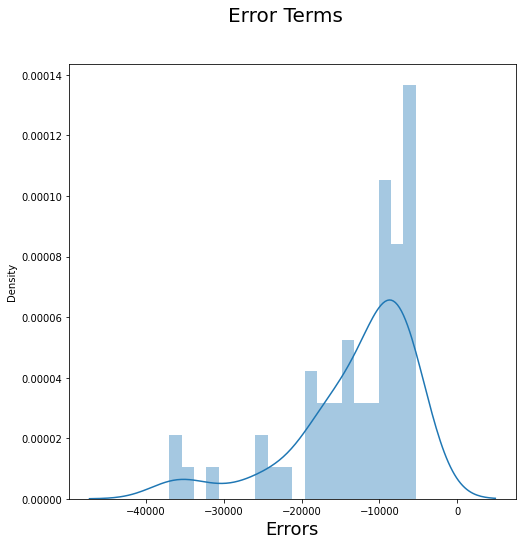

In [73]:
fig = plt.figure(figsize=(8,8))
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Making Second Model For Tuning

In [75]:
# Making Second Model

from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
#model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
#model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
Total params: 13,120
Trainable params: 13,120
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Training Model

history_1 = model2.fit(train_data, train_labels, epochs=1000, verbose = 0, validation_split=0.2)

In [77]:
# Feeding history_1 In DataFrame

history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
995,32052446.0,32052446.0,2942.338867,51321824.0,51321824.0,3641.522705,995
996,31982356.0,31982356.0,2906.366211,51044100.0,51044100.0,3618.997803,996
997,32035502.0,32035502.0,2920.515869,51053160.0,51053160.0,3613.542725,997
998,31959368.0,31959368.0,2924.195068,51310388.0,51310388.0,3643.607666,998
999,31985914.0,31985914.0,2899.882568,50542028.0,50542028.0,3559.025635,999


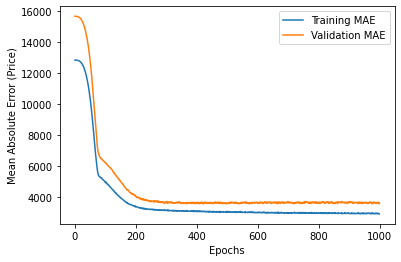

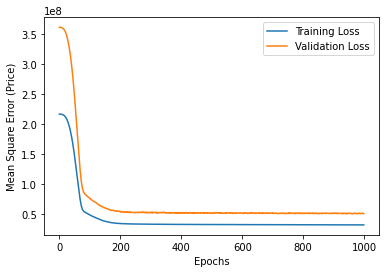

In [78]:
# Plotting Loss

def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

In [79]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [80]:
test1_score = model2.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 4ms/step - loss: 35991476.0000 - mse: 35991476.0000 - mae: 3511.9861


In [81]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 35991476.0
Mean Absolute Error: 3511.986083984375


ValueError: ignored

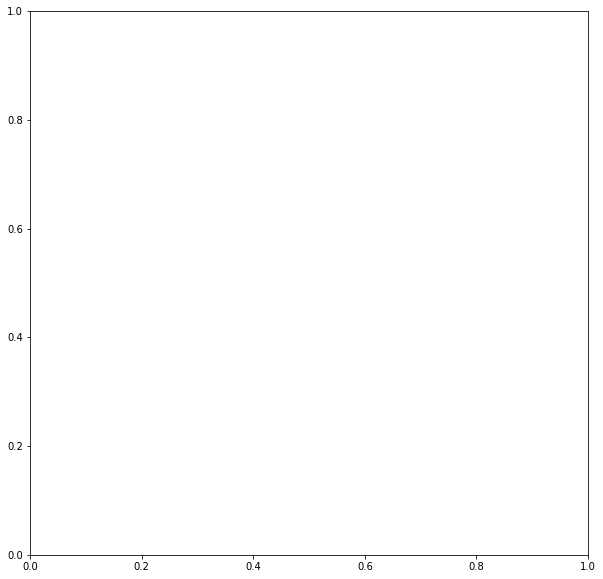

In [83]:
# Making Price Predictions On Test Data

fig = plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions1)
fig.suptitle('Actual Price Vs Predicted Price', fontsize=20)             
plt.xlabel('Test', fontsize=18)                         
plt.ylabel('Predict', fontsize=16)   
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)